# **Libraries**

In [10]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


# **log transformation**
*It spreads out the intensity values of dark pixels and compresses the intensity values of bright pixels*

**When to use:**

*When you want to enhance details in darker regions of an image.
Common in medical images like X-rays and MRIs to reveal faint details.*

In [ ]:
def log_transformation(image_path):
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    img_float = img.astype(np.float32)
    c = 255 / np.log(1 + np.max(img_float))
    log_img = c * np.log(1 + img_float)
    return np.uint8(np.clip(log_img, 0, 255))

# **negative_transformation**
*It inverts all pixel values.
Black becomes white, white becomes black, and so on.*

**When to use:**

*When you want to highlight white/bright objects on a dark background.
Useful for medical imaging (e.g., detecting infections) or satellite images.*

In [ ]:
def negative_transformation(image_path):
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    return 255 - img

# **piecewise linear transformation**
*It adjusts pixel intensities differently across different ranges by using multiple linear mappings.*

**When to use:**

*When you want to enhance specific ranges of intensity.
Useful if an image has good quality in some regions but poor in others.
More flexible than simple global transformations*

In [ ]:
def piecewise_linear_transformation(image_path, r1=70, r2=140, s1=0, s2=255):
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    img = img.astype(np.float32)
    output = np.zeros_like(img)

    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            r = img[i, j]
            if r < r1:
                output[i, j] = (s1 / r1) * r
            elif r < r2:
                output[i, j] = ((s2 - s1) / (r2 - r1)) * (r - r1) + s1
            else:
                output[i, j] = ((255 - s2) / (255 - r2)) * (r - r2) + s2
    return np.uint8(np.clip(output, 0, 255))

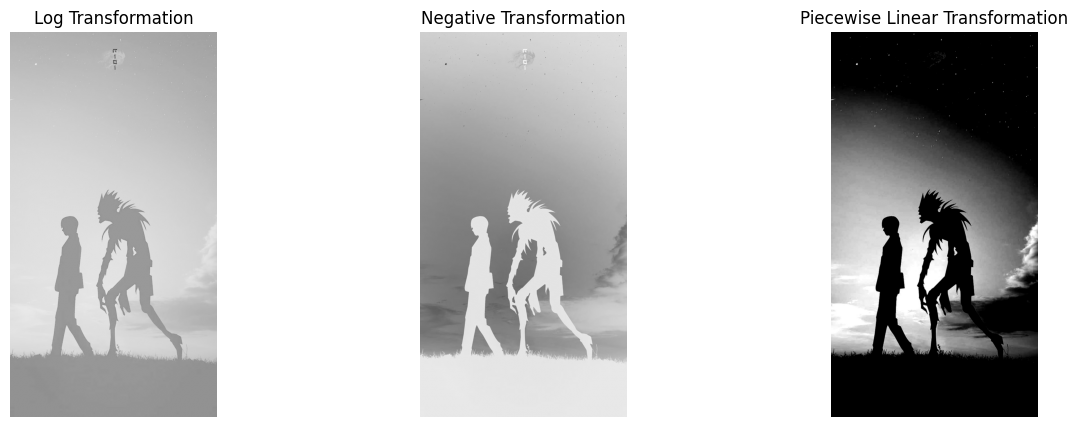

In [11]:

image_path = '/content/im.jpg'


log_img = log_transformation(image_path)
neg_img = negative_transformation(image_path)
piecewise_img = piecewise_linear_transformation(image_path)

plt.figure(figsize=(15,5))

plt.subplot(1, 3, 1)
plt.imshow(log_img, cmap='gray')
plt.title('Log Transformation')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(neg_img, cmap='gray')
plt.title('Negative Transformation')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(piecewise_img, cmap='gray')
plt.title('Piecewise Linear Transformation')
plt.axis('off')

plt.show()
